In [1]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv", index_col=0)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1107611 entries, 0 to 1107610
Data columns (total 28 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   applicant_ethnicity             1107611 non-null  int64  
 1   income                          984345 non-null   float64
 2   applicant_race_1                1107376 non-null  float64
 3   applicant_race_2                35442 non-null    float64
 4   applicant_race_3                3369 non-null     float64
 5   applicant_race_4                374 non-null      float64
 6   applicant_race_5                106 non-null      float64
 7   applicant_sex                   1107611 non-null  int64  
 8   co_applicant_ethnicity          1107611 non-null  int64  
 9   co_applicant_race_1             1107523 non-null  float64
 10  co_applicant_race_2             11395 non-null    float64
 11  co_applicant_race_3             999 non-null      float64
 12  co_ap

Анализ подсчетом значений каждой отдельной переменной показал, что к численным признакам относятся 
1. hud_median_family_income, 
2. loan_amount
3. number_of_1_to_4_family_units
4. number_of_owner_occupied_units
5. minority_population
6. population 

Остальные признаки являются категориальными

ValueError: method must be either 'pearson', 'spearman', 'kendall', or a callable, '['income', 'target']' was supplied

#### Значение дохода
Можно предположить, что доход имеет большое значение при выдаче ипотеки. Если построить график, то можно заметить, что это правда

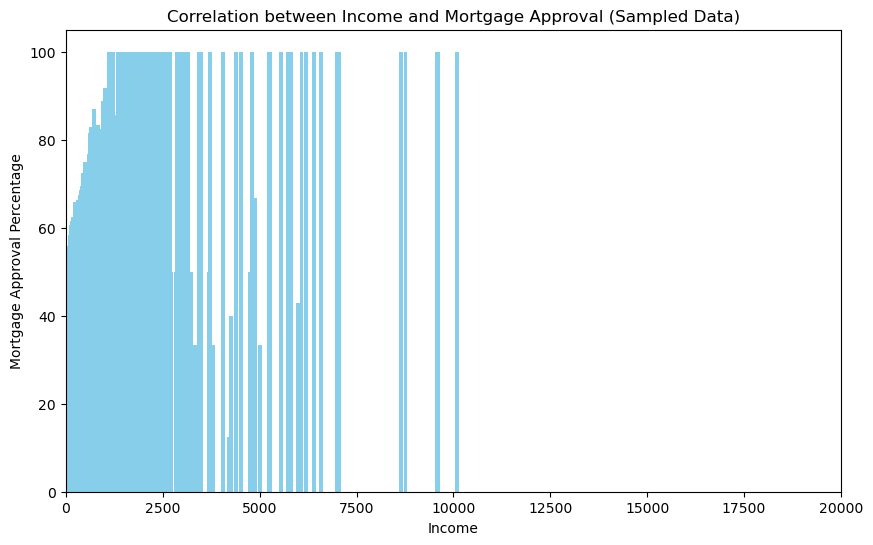

In [24]:
# Calculate the percentage of approved mortgages for each income level
df['mortgage_approval_percentage'] = df.groupby('income')['target'].transform('mean') * 100

# Randomly sample 5% of the data for plotting
sampled_df = df.sample(frac=0.05, random_state=42)

# Create a bar plot to show the correlation between income and mortgage approval
plt.figure(figsize=(10, 6))
plt.bar(sampled_df['income'], sampled_df['mortgage_approval_percentage'], color='skyblue',  width=100)
plt.xlabel('Income')
plt.ylabel('Mortgage Approval Percentage')
plt.title('Correlation between Income and Mortgage Approval (Sampled Data)')
plt.xlim(0, 20000)
plt.show()

#### Цель займа так же важна для кредитора

Можно заметить, что под разные цели кредиты выдаются с заметно разной вероятностью

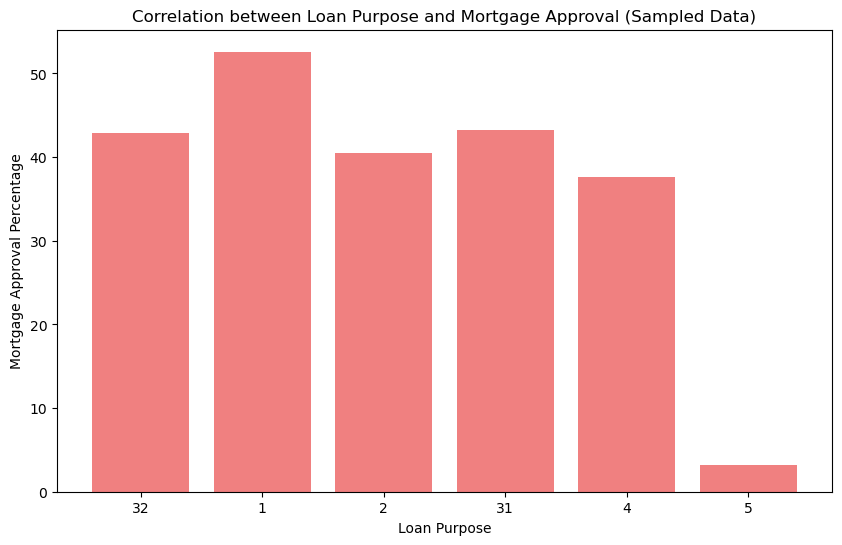

In [18]:
df = pd.read_csv("train.csv", index_col=0)

df['loan_purpose'] = df['loan_purpose'].map(str)

# Calculate the percentage of approved mortgages for each loan purpose
df['mortgage_approval_percentage'] = df.groupby('loan_purpose')['target'].transform('mean') * 100

# Randomly sample 1% of the data for plotting
sampled_df = df.sample(frac=0.01, random_state=42)

# Create a bar plot with fixed width for each bar
plt.figure(figsize=(10, 6))
plt.bar(sampled_df['loan_purpose'], sampled_df['mortgage_approval_percentage'], color='lightcoral')
plt.xlabel('Loan Purpose')
plt.ylabel('Mortgage Approval Percentage')
plt.title('Correlation between Loan Purpose and Mortgage Approval (Sampled Data)')

plt.show()

### Влияет ли преодобрение на финальное решение?

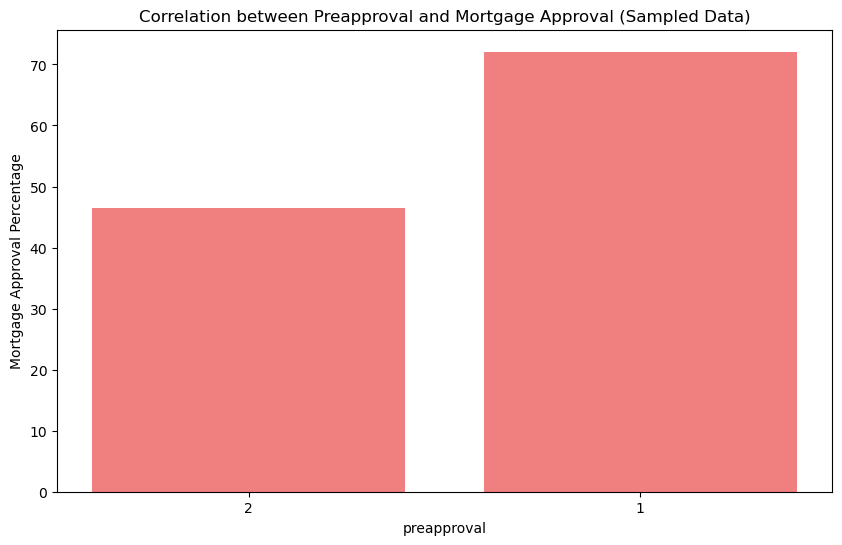

In [20]:
df = pd.read_csv("train.csv", index_col=0)

df['preapproval'] = df['preapproval'].map(str)

# Calculate the percentage of approved mortgages for each preapproval
df['mortgage_approval_percentage'] = df.groupby('preapproval')['target'].transform('mean') * 100

# Randomly sample 1% of the data for plotting
sampled_df = df.sample(frac=0.01, random_state=42)

# Create a bar plot with fixed width for each bar
plt.figure(figsize=(10, 6))
plt.bar(sampled_df['preapproval'], sampled_df['mortgage_approval_percentage'], color='lightcoral')
plt.xlabel('Preapproval')
plt.ylabel('Mortgage Approval Percentage')
plt.title('Correlation between Preapproval and Mortgage Approval (Sampled Data)')

plt.show()